In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

In [2]:
health = pd.read_csv('health_for_modeling.csv')

In [3]:
health.head()

,Unnamed: 0,Unnamed: 0.1,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,...,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment,PRI_NEIGH,tobacco,Childcare,Liquor Sellers
0,0,0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,...,22.7,7.9,28.8,18.1,23714,7.5,Rogers Park,816,61,826
1,1,1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,...,15.1,7.0,38.3,19.6,21375,7.9,West Ridge,948,137,1022
2,2,2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,...,22.7,4.6,22.2,13.6,32355,7.7,Uptown,879,90,999
3,3,3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,...,9.5,3.1,25.6,12.5,35503,6.8,Lincoln Square,609,72,1444
4,4,4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,...,7.1,0.2,25.5,5.4,51615,4.5,North Center,524,108,1528


In [4]:
health.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Community Area', 'Community Area Name',
       'Birth Rate', 'General Fertility Rate', 'Low Birth Weight',
       'Prenatal Care Beginning in First Trimester', 'Preterm Births',
       'Teen Birth Rate', 'Assault (Homicide)', 'Breast cancer in females',
       'Cancer (All Sites)', 'Colorectal Cancer', 'Diabetes-related',
       'Firearm-related', 'Infant Mortality Rate', 'Lung Cancer',
       'Prostate Cancer in Males', 'Stroke (Cerebrovascular Disease)',
       'Childhood Blood Lead Level Screening', 'Childhood Lead Poisoning',
       'Gonorrhea in Females', 'Gonorrhea in Males', 'Tuberculosis',
       'Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma', 'Per Capita Income', 'Unemployment',
       'PRI_NEIGH', 'tobacco', 'Childcare', 'Liquor Sellers'],
      dtype='object')

In [5]:
cols = ['Unnamed: 0', 'Unnamed: 0.1', 'Community Area', 'Community Area Name',
       'Birth Rate', 'General Fertility Rate', 'Low Birth Weight',
       'Prenatal Care Beginning in First Trimester', 'Preterm Births',
       'Teen Birth Rate', 'Assault (Homicide)', 'Breast cancer in females',
       'Cancer (All Sites)', 'Colorectal Cancer', 'Diabetes-related',
       'Firearm-related', 'Infant Mortality Rate', 'Lung Cancer',
       'Prostate Cancer in Males', 'Stroke (Cerebrovascular Disease)',
       'Childhood Blood Lead Level Screening', 'Childhood Lead Poisoning',
       'Gonorrhea in Females', 'Gonorrhea in Males', 'Tuberculosis',
       'Below Poverty Level', 'Crowded Housing', 'Dependency',
       'No High School Diploma', 'Per Capita Income', 'Unemployment',
       'PRI_NEIGH', 'tobacco', 'Childcare', 'Liquor Sellers']

In [6]:
col_names = []
for i in cols:
    j = i.replace(' ','_')
    col_names.append(j)

In [7]:
col_names

['Unnamed:_0',
 'Unnamed:_0.1',
 'Community_Area',
 'Community_Area_Name',
 'Birth_Rate',
 'General_Fertility_Rate',
 'Low_Birth_Weight',
 'Prenatal_Care_Beginning_in_First_Trimester',
 'Preterm_Births',
 'Teen_Birth_Rate',
 'Assault_(Homicide)',
 'Breast_cancer_in_females',
 'Cancer_(All_Sites)',
 'Colorectal_Cancer',
 'Diabetes-related',
 'Firearm-related',
 'Infant_Mortality_Rate',
 'Lung_Cancer',
 'Prostate_Cancer_in_Males',
 'Stroke_(Cerebrovascular_Disease)',
 'Childhood_Blood_Lead_Level_Screening',
 'Childhood_Lead_Poisoning',
 'Gonorrhea_in_Females',
 'Gonorrhea_in_Males',
 'Tuberculosis',
 'Below_Poverty_Level',
 'Crowded_Housing',
 'Dependency',
 'No_High_School_Diploma',
 'Per_Capita_Income',
 'Unemployment',
 'PRI_NEIGH',
 'tobacco',
 'Childcare',
 'Liquor_Sellers']

In [8]:
health.columns=col_names

In [9]:
health.columns

Index(['Unnamed:_0', 'Unnamed:_0.1', 'Community_Area', 'Community_Area_Name',
       'Birth_Rate', 'General_Fertility_Rate', 'Low_Birth_Weight',
       'Prenatal_Care_Beginning_in_First_Trimester', 'Preterm_Births',
       'Teen_Birth_Rate', 'Assault_(Homicide)', 'Breast_cancer_in_females',
       'Cancer_(All_Sites)', 'Colorectal_Cancer', 'Diabetes-related',
       'Firearm-related', 'Infant_Mortality_Rate', 'Lung_Cancer',
       'Prostate_Cancer_in_Males', 'Stroke_(Cerebrovascular_Disease)',
       'Childhood_Blood_Lead_Level_Screening', 'Childhood_Lead_Poisoning',
       'Gonorrhea_in_Females', 'Gonorrhea_in_Males', 'Tuberculosis',
       'Below_Poverty_Level', 'Crowded_Housing', 'Dependency',
       'No_High_School_Diploma', 'Per_Capita_Income', 'Unemployment',
       'PRI_NEIGH', 'tobacco', 'Childcare', 'Liquor_Sellers'],
      dtype='object')

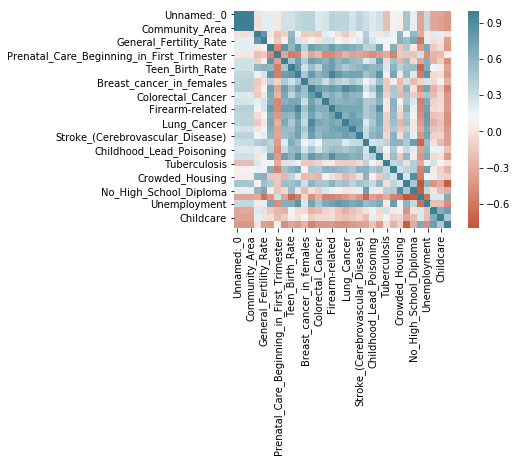

<Figure size 7200x7200 with 0 Axes>

In [10]:
corr = health.corr()
sns.heatmap(
    corr, cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.figure(figsize=(100,100))
plt.show()

In [11]:
IM = health[['Childcare', 'No_High_School_Diploma', 'Per_Capita_Income', 'Crowded_Housing', 'Below_Poverty_Level',
             'Low_Birth_Weight', 'General_Fertility_Rate', 
             'Liquor_Sellers', 'Infant_Mortality_Rate']]

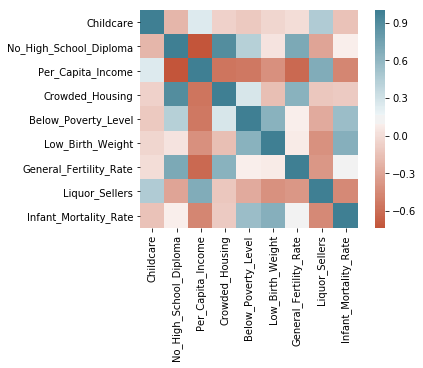

<Figure size 7200x7200 with 0 Axes>

In [12]:
corr = IM.corr()
sns.heatmap(
    corr, cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.figure(figsize=(100,100))
plt.show()

In [13]:
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Childcare,No_High_School_Diploma,Per_Capita_Income,Crowded_Housing,Below_Poverty_Level,Low_Birth_Weight,General_Fertility_Rate,Liquor_Sellers,Infant_Mortality_Rate
Childcare,1,-0.210016,0.237473,-0.063046,-0.101657,-0.0388161,0.00112112,0.459567,-0.142801
No_High_School_Diploma,-0.210016,1,-0.734681,0.896796,0.429604,0.0324947,0.699855,-0.303973,0.0960836
Per_Capita_Income,0.237473,-0.734681,1,-0.559776,-0.542984,-0.412713,-0.615577,0.680746,-0.458523
Crowded_Housing,-0.063046,0.896796,-0.559776,1,0.2796,-0.157401,0.639606,-0.117831,-0.0960251
Below_Poverty_Level,-0.101657,0.429604,-0.542984,0.2796,1,0.64261,0.0915779,-0.273976,0.560582
Low_Birth_Weight,-0.0388161,0.0324947,-0.412713,-0.157401,0.64261,1,0.0733777,-0.39807,0.654909
General_Fertility_Rate,0.00112112,0.699855,-0.615577,0.639606,0.0915779,0.0733777,1,-0.376214,0.115675
Liquor_Sellers,0.459567,-0.303973,0.680746,-0.117831,-0.273976,-0.39807,-0.376214,1,-0.453825
Infant_Mortality_Rate,-0.142801,0.0960836,-0.458523,-0.0960251,0.560582,0.654909,0.115675,-0.453825,1


In [14]:
LC = health[['tobacco', 'No_High_School_Diploma', 'Per_Capita_Income', 'Liquor_Sellers', 'Crowded_Housing',
            'Below_Poverty_Level', 'Dependency', 'Lung_Cancer']]

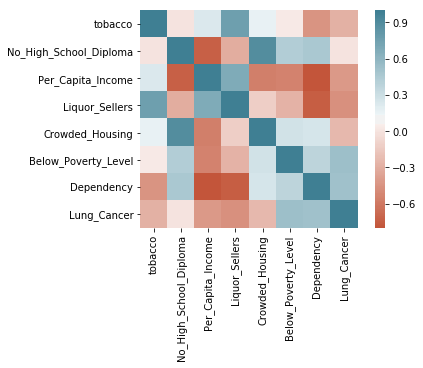

<Figure size 7200x7200 with 0 Axes>

In [15]:
corr = LC.corr()
sns.heatmap(
    corr, cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.figure(figsize=(100,100))
plt.show()

In [16]:
corr.style.background_gradient(cmap='coolwarm', axis=None)

,tobacco,No_High_School_Diploma,Per_Capita_Income,Liquor_Sellers,Crowded_Housing,Below_Poverty_Level,Dependency,Lung_Cancer
tobacco,1,-0.00583338,0.230536,0.761907,0.172012,0.0303445,-0.447295,-0.283464
No_High_School_Diploma,-0.00583338,1,-0.734681,-0.303973,0.896796,0.429604,0.46753,-0.00591903
Per_Capita_Income,0.230536,-0.734681,1,0.680746,-0.559776,-0.542984,-0.799148,-0.414202
Liquor_Sellers,0.761907,-0.303973,0.680746,1,-0.117831,-0.273976,-0.740501,-0.457868
Crowded_Housing,0.172012,0.896796,-0.559776,-0.117831,1,0.2796,0.261612,-0.234205
Below_Poverty_Level,0.0303445,0.429604,-0.542984,-0.273976,0.2796,1,0.377591,0.530949
Dependency,-0.447295,0.46753,-0.799148,-0.740501,0.261612,0.377591,1,0.518638
Lung_Cancer,-0.283464,-0.00591903,-0.414202,-0.457868,-0.234205,0.530949,0.518638,1


In [17]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
m = ols('Lung_Cancer ~ tobacco +  No_High_School_Diploma + Per_Capita_Income + Liquor_Sellers + Crowded_Housing + Below_Poverty_Level + Dependency', health).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            Lung_Cancer   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     13.76
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           3.31e-10
Time:                        14:38:01   Log-Likelihood:                -235.45
No. Observations:                  64   AIC:                             486.9
Df Residuals:                      56   BIC:                             504.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 38

In [19]:
m1 = ols('Infant_Mortality_Rate ~ Childcare +  No_High_School_Diploma + Per_Capita_Income + Crowded_Housing + Below_Poverty_Level + Low_Birth_Weight + General_Fertility_Rate + Childhood_Lead_Poisoning + Gonorrhea_in_Females + Liquor_Sellers', health).fit()
print(m1.summary())

                              OLS Regression Results                             
Dep. Variable:     Infant_Mortality_Rate   R-squared:                       0.634
Model:                               OLS   Adj. R-squared:                  0.565
Method:                    Least Squares   F-statistic:                     9.198
Date:                   Sat, 12 Oct 2019   Prob (F-statistic):           1.36e-08
Time:                           14:38:02   Log-Likelihood:                -152.22
No. Observations:                     64   AIC:                             326.4
Df Residuals:                         53   BIC:                             350.2
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [20]:
#use scikit learn to make decision 
#use base parameters
#if not huge inprovement try random forest
#use train test sploit

In [21]:
#create train test split
from sklearn.model_selection import train_test_split
LX = health[['tobacco', 'No_High_School_Diploma', 'Per_Capita_Income', 'Liquor_Sellers', 'Crowded_Housing',
            'Below_Poverty_Level', 'Dependency']]
#LX.drop(columns=['Lung_Cancer','Unnamed:_0', 'Unnamed:_0.1', 'Community_Area', 'Community_Area_Name', 'PRI_NEIGH'])
Ly = health['Lung_Cancer']
LX.columns


Index(['tobacco', 'No_High_School_Diploma', 'Per_Capita_Income',
       'Liquor_Sellers', 'Crowded_Housing', 'Below_Poverty_Level',
       'Dependency'],
      dtype='object')

In [22]:
LX_train, LX_test, Ly_train, Ly_test = train_test_split(
    LX, Ly, test_size=0.2, random_state=42)


In [23]:
IX = health[['Childcare', 'No_High_School_Diploma', 'Per_Capita_Income', 'Crowded_Housing', 'Below_Poverty_Level',
             'Low_Birth_Weight', 'General_Fertility_Rate', 
             'Liquor_Sellers']]
#IX.drop(['Infant_Mortality_Rate', 'Unnamed:_0', 'Unnamed:_0.1', 'Community_Area', 'Community_Area_Name', 'PRI_NEIGH'], axis=1)
Iy = health['Infant_Mortality_Rate']

In [24]:
IX_train, IX_test, Iy_train, Iy_test = train_test_split(
    IX, Iy, test_size=0.2, random_state=42)


In [25]:
IX_train.head()

,Childcare,No_High_School_Diploma,Per_Capita_Income,Crowded_Housing,Below_Poverty_Level,Low_Birth_Weight,General_Fertility_Rate,Liquor_Sellers
13,77,22.0,26713,5.6,10.8,7.7,67.1,1235
34,77,14.9,18366,2.9,31.5,13.8,67.9,333
50,38,42.4,12524,12.2,30.6,11.8,93.4,736
3,72,12.5,35503,3.1,9.5,8.1,61.0,1444
17,31,25.7,20489,5.8,14.6,7.3,77.7,1031


In [26]:
from sklearn.tree import DecisionTreeRegressor
clf_LDT = DecisionTreeRegressor()

clf_LDT = clf_LDT.fit(LX_train, Ly_train)
Ly_pred = clf_LDT.predict(LX_test)


In [27]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Ly_test, Ly_pred))


104.83999999999997


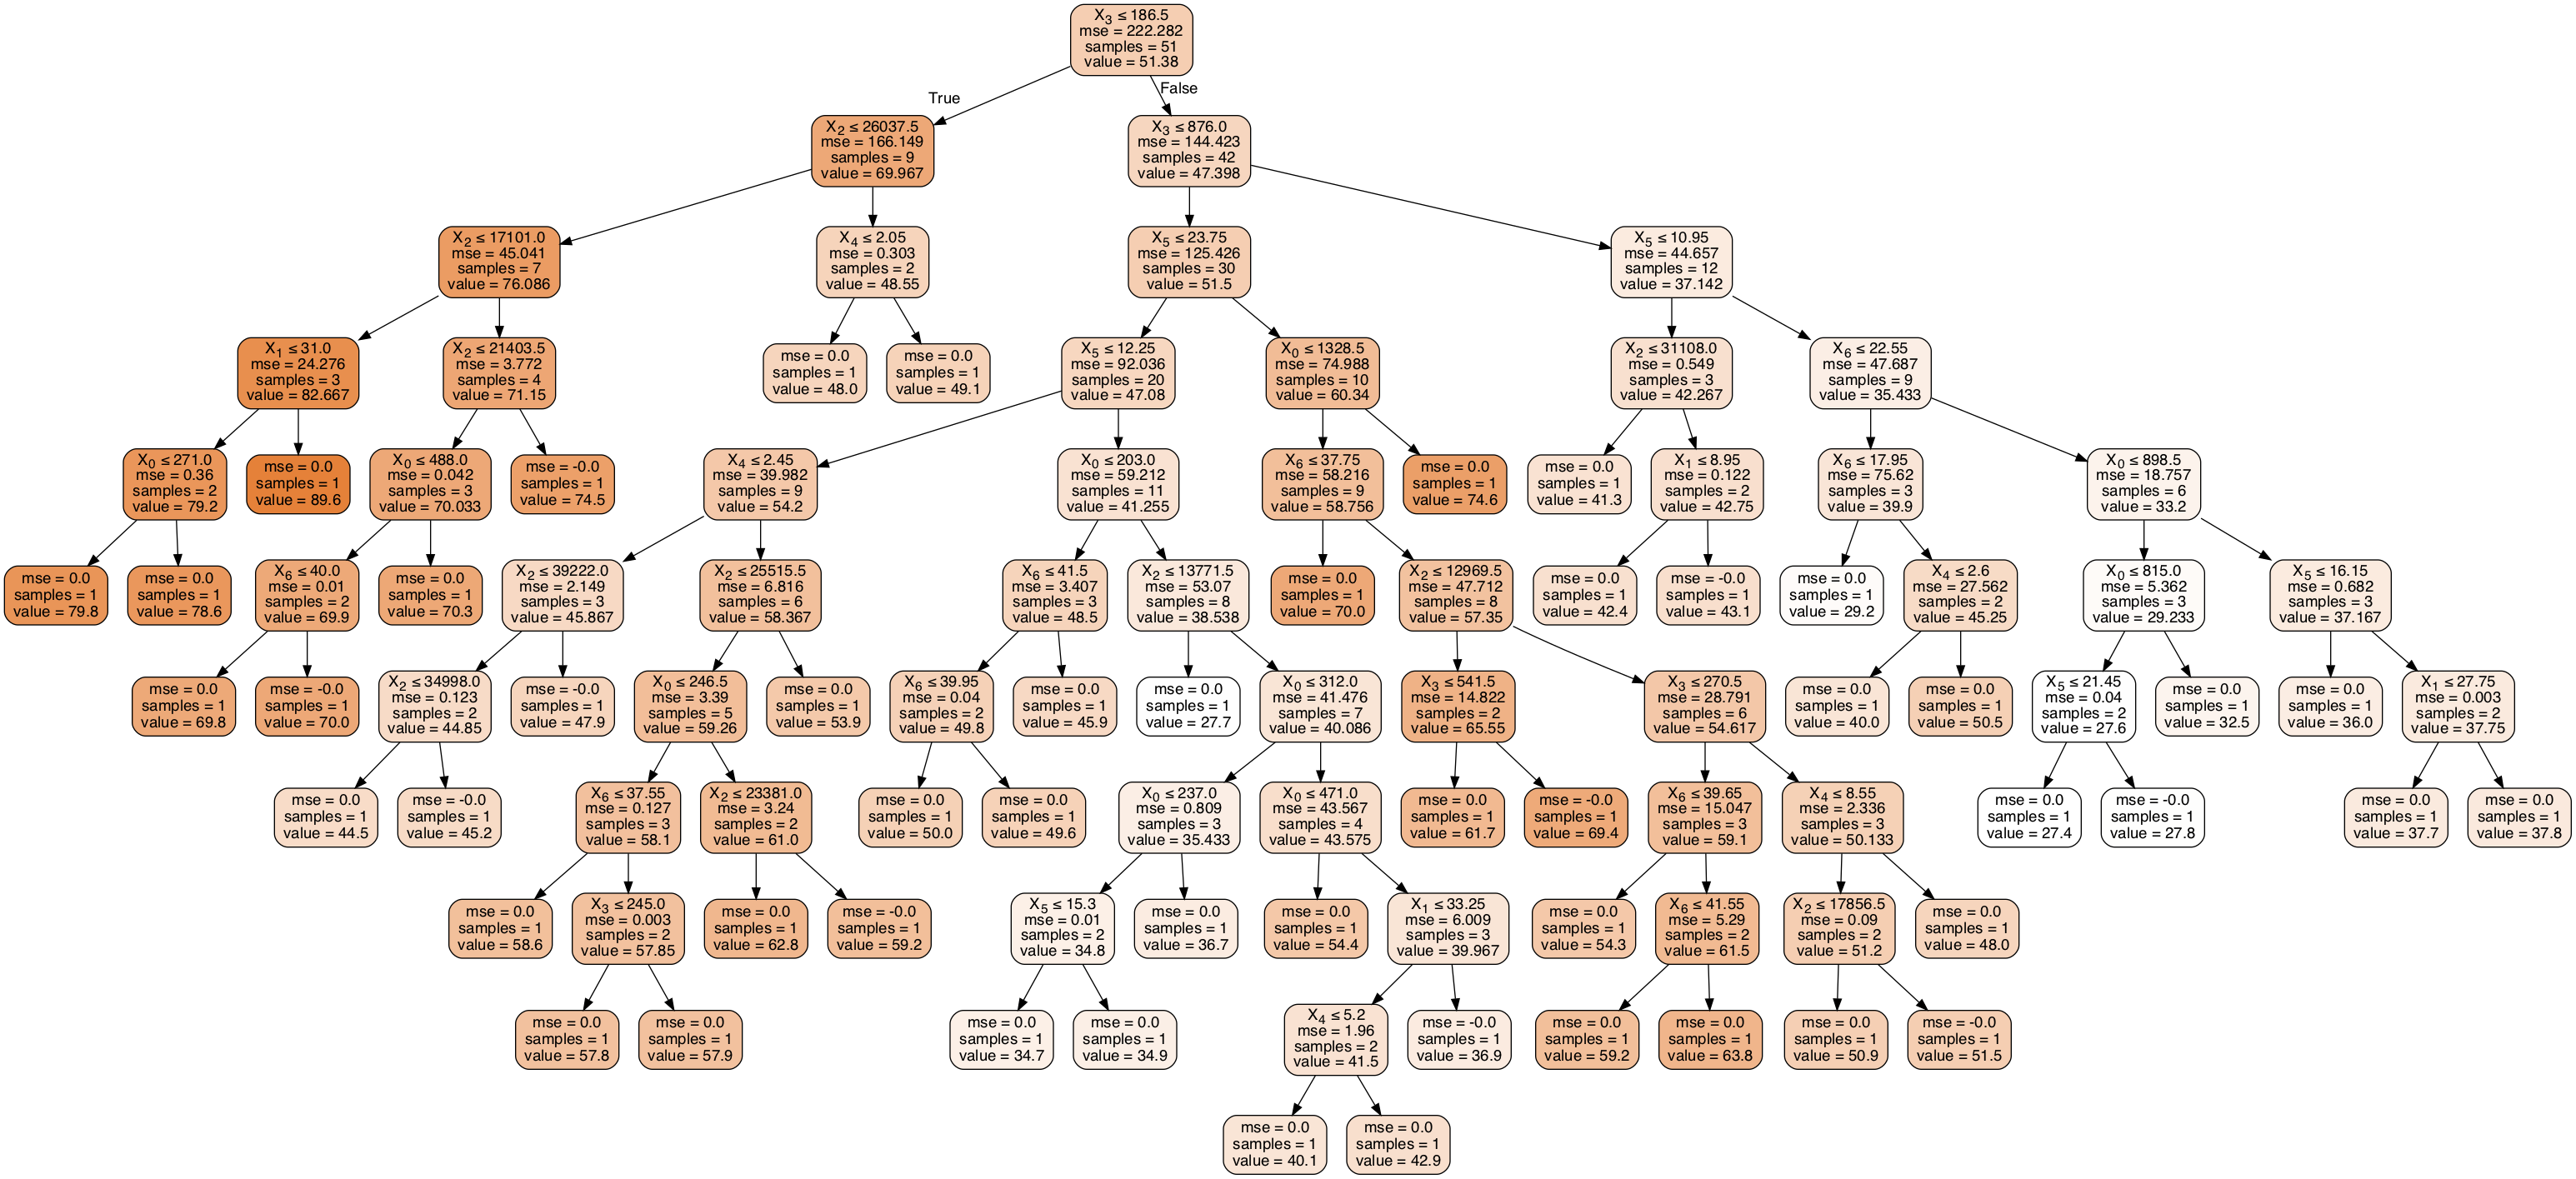

In [28]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_LDT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'random_state': list(range(0,100))    
}

grid_search = GridSearchCV(estimator = clf_LDT, param_grid = param_grid)

In [30]:
grid_search.fit(LX_train, Ly_train)
grid_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'random_state': 83}

In [31]:
clf_LDT = DecisionTreeRegressor(random_state = 83)
clf_LDT = clf_LDT.fit(LX_train, Ly_train)
Ly_pred = clf_LDT.predict(LX_test)
print(mean_squared_error(Ly_test, Ly_pred))

105.5730769230769


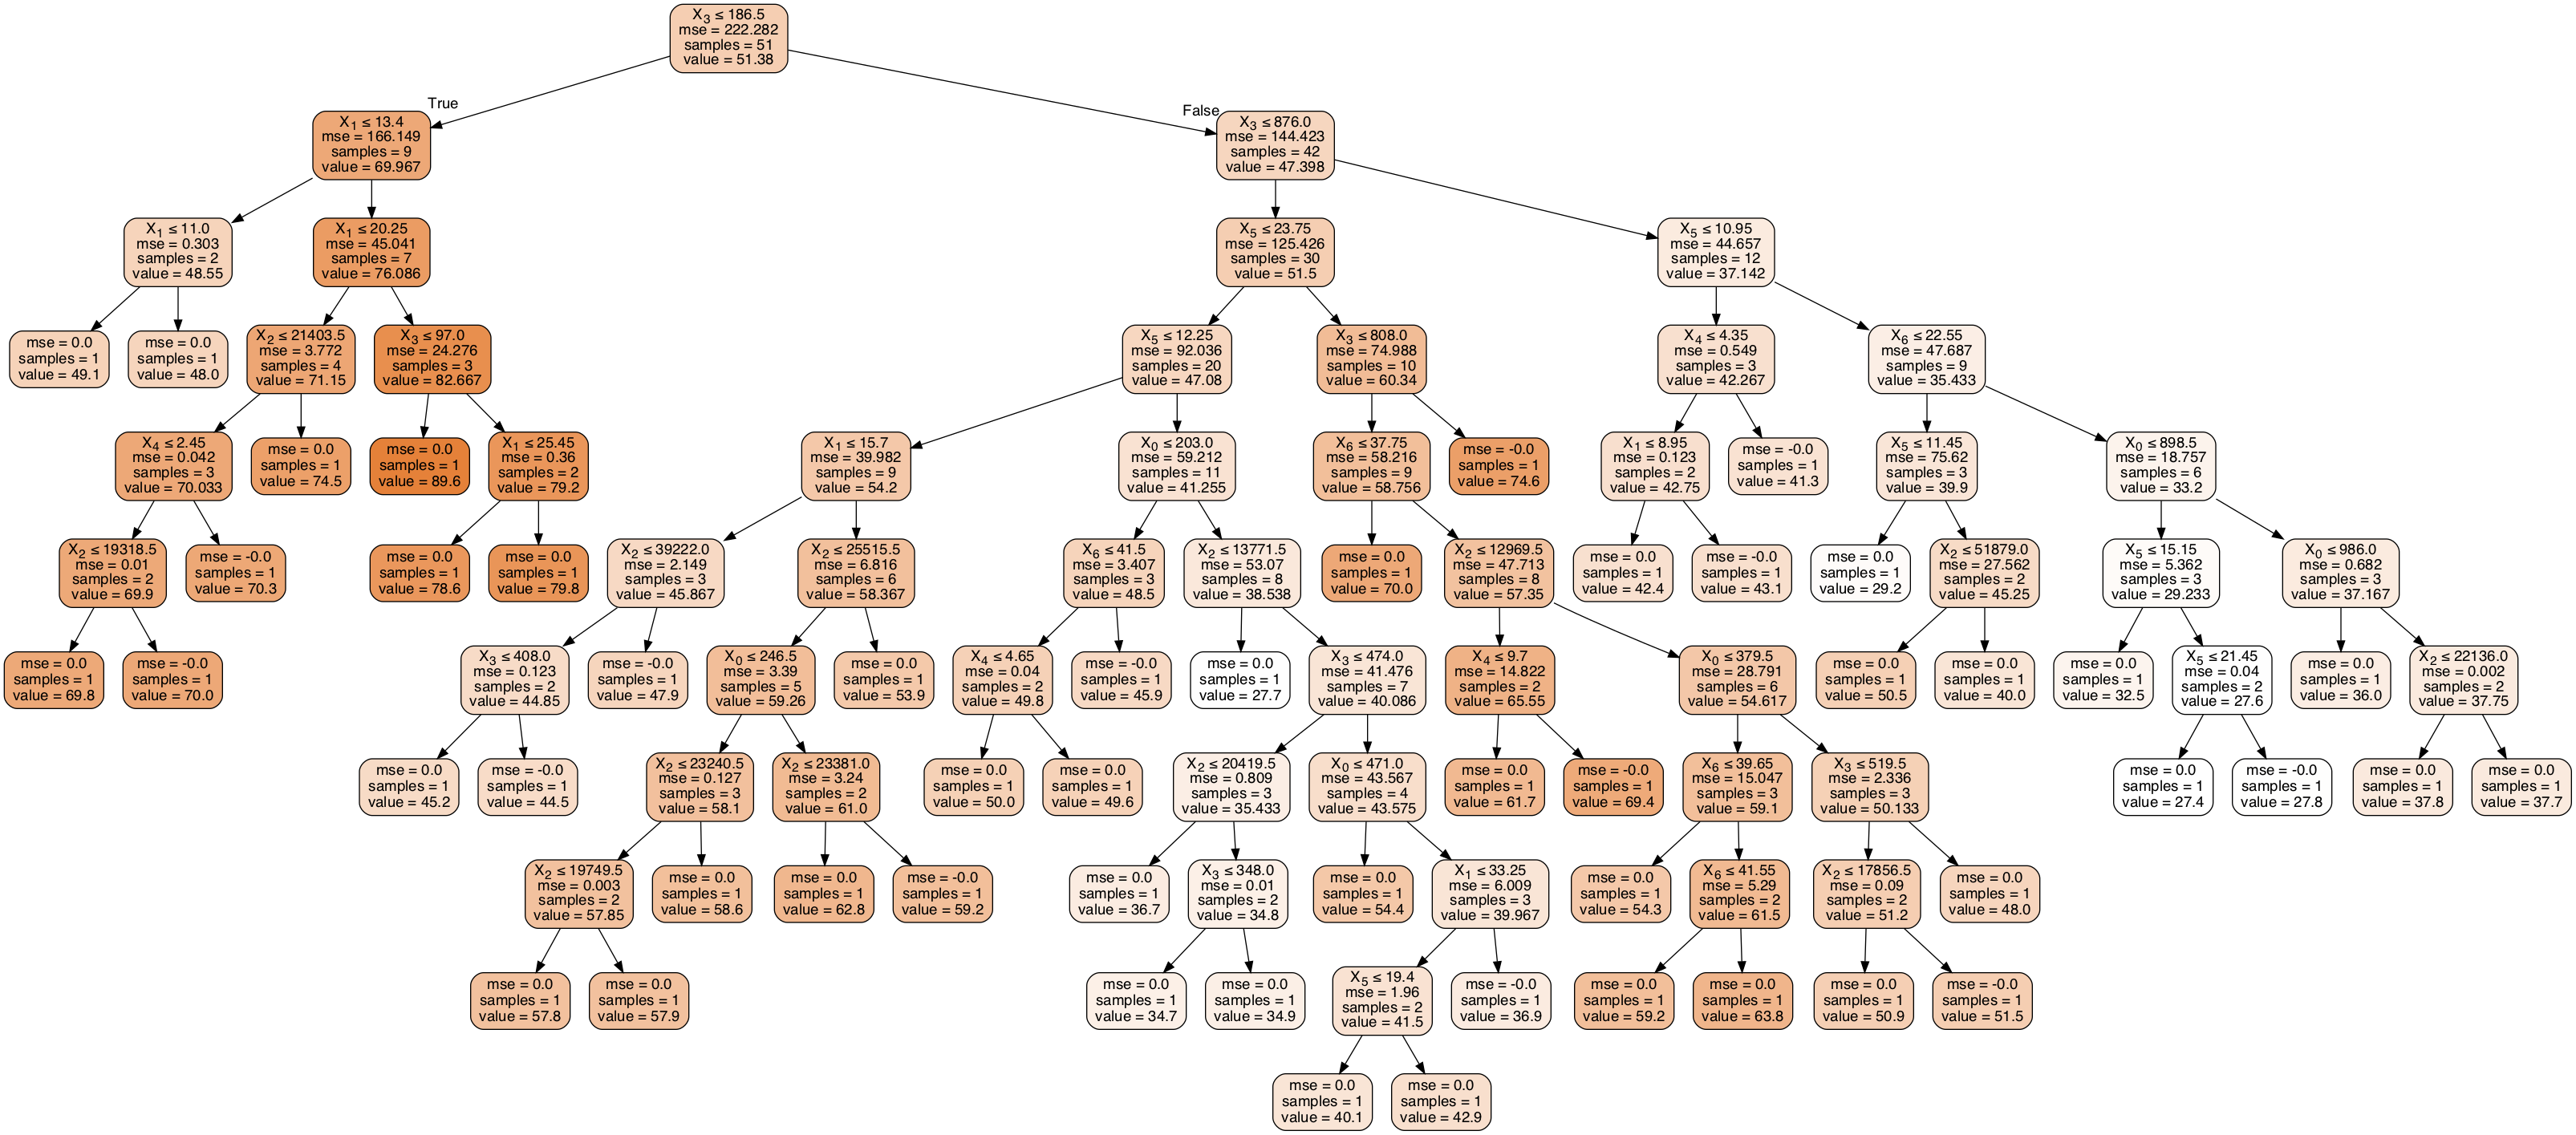

In [32]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_LDT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [33]:
param_grid = {
    'max_depth': [2,4,5,8,10,12,15,20],
    'min_samples_split': [2,5,8,10,12,15,20,30,40,50],
    'max_features': [2,3,4,5,6,7]
}

grid_search = GridSearchCV(estimator = clf_LDT, param_grid = param_grid)

In [34]:
grid_search.fit(LX_train, Ly_train)
grid_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 2, 'max_features': 7, 'min_samples_split': 2}

In [35]:
clf_LDT = DecisionTreeRegressor(max_depth=2, max_features=7, min_samples_split = 2, random_state = 83)
clf_LDT = clf_LDT.fit(LX_train, Ly_train)
Ly_pred = clf_LDT.predict(LX_test)
print(mean_squared_error(Ly_test, Ly_pred))

176.94041753881035


In [41]:
Ly_pred.reshape(-1,1)

(13,)

In [45]:
#from sklearn import metrics
#score(np.array(Ly_test).reshape(-1,1), np.array(Ly_pred).reshape(-1,1))

NameError: name 'score' is not defined

In [61]:
clf_LDT.score(LX_test, Ly_test)

0.49705037069879016

In [62]:
clf_LDT.score(LX_train, Ly_train)

0.5929421403953726

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_LDT, LX_train, Ly_train, cv=5)

array([ 0.42223256, -0.00238968,  0.20556719, -0.1870932 ,  0.7224936 ])

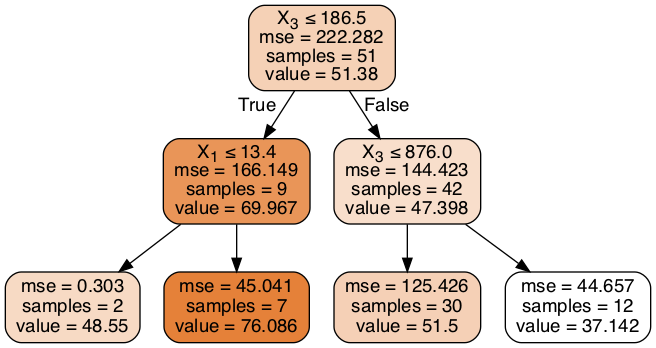

In [47]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_LDT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [48]:
#for infant mortality
clf_IM = DecisionTreeRegressor(random_state=42)

clf_IM = clf_IM.fit(IX_train, Iy_train)
Iy_pred = clf_IM.predict(IX_test)

In [49]:
print(mean_squared_error(Iy_test, Iy_pred))

19.450000000000003


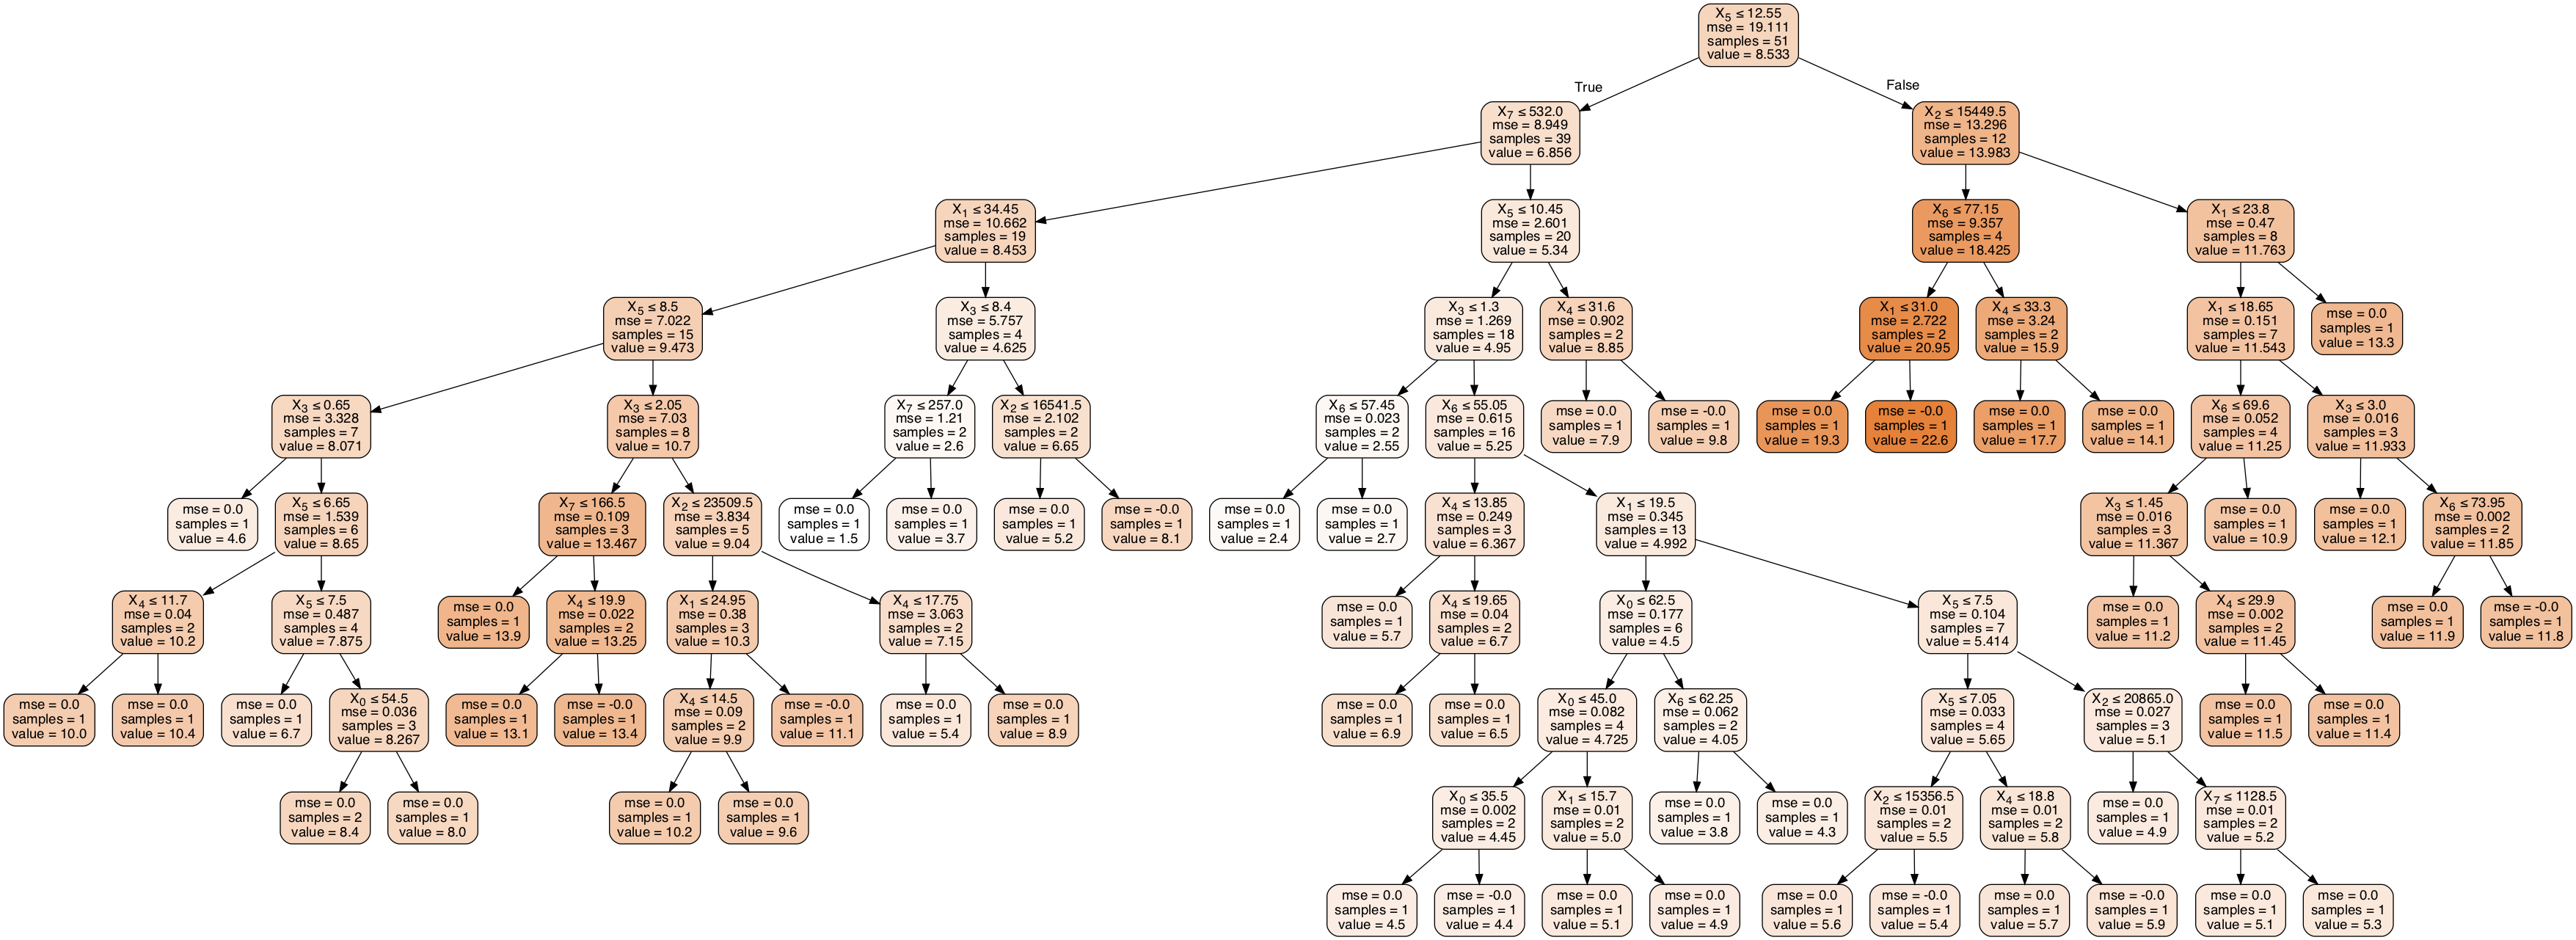

In [50]:
dot_data = StringIO()
export_graphviz(clf_IM, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [51]:
param_grid = {
    'max_depth': [2,4,5,8,10,12,15,20],
    'min_samples_split': [2,5,8,10,12,15,20,30,40,50],
    'max_features': [2,3,4,5,6,7]
}

grid_search = GridSearchCV(estimator = clf_IM, param_grid = param_grid)

In [52]:
grid_search.fit(IX_train, Iy_train)
grid_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 2, 'max_features': 7, 'min_samples_split': 30}

In [53]:
clf_IM = DecisionTreeRegressor(max_depth=2, max_features=7, min_samples_split = 30, random_state = 83)
clf_IM = clf_IM.fit(IX_train, Iy_train)
Iy_pred = clf_IM.predict(IX_test)
print(mean_squared_error(Iy_test, Iy_pred))

13.04153707649691


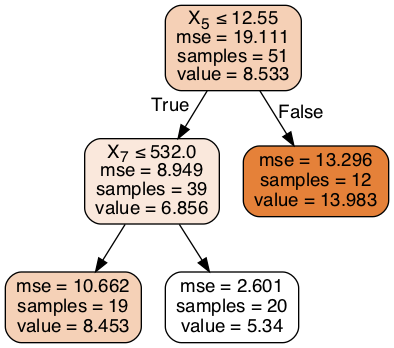

In [54]:
dot_data = StringIO()
export_graphviz(clf_IM, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [55]:
from sklearn.ensemble import RandomForestRegressor
clf_IMRF = RandomForestRegressor()

clf_IMRF = clf_IMRF.fit(IX_train, Iy_train)
Iy_pred = clf_IMRF.predict(IX_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
print("Accuracy:",clf_IMRF.score(IX_test, Iy_test))
print(mean_squared_error(Iy_test, Iy_pred))

Accuracy: 0.29955246520706014
11.721761538461543


In [57]:
feature_importances_IM = pd.DataFrame(clf_IMRF.feature_importances_,
                                   index = IX_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_IM

,importance
Low_Birth_Weight,0.543247
Liquor_Sellers,0.131609
Below_Poverty_Level,0.091973
No_High_School_Diploma,0.059256
Childcare,0.049657
General_Fertility_Rate,0.048099
Per_Capita_Income,0.047507
Crowded_Housing,0.028652


In [58]:
clf_LRF = RandomForestRegressor()

clf_LRF = clf_LRF.fit(LX_train, Ly_train)
Ly_pred = clf_LRF.predict(LX_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
print("Accuracy:",clf_LRF.score(LX_test, Ly_test))
print(mean_squared_error(Ly_test, Ly_pred))

Accuracy: 0.6337585644432304
128.84573076923076


In [63]:
param_grid = {
    'n_estimators': [20, 50],
    'min_samples_split': [2,5,8,10,12,15]
}

grid_search = GridSearchCV(estimator = clf_LRF, param_grid = param_grid)

In [64]:
grid_search.fit(LX_train, Ly_train)
grid_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'min_samples_split': 5, 'n_estimators': 50}

In [77]:
clf_LRF = RandomForestRegressor(n_estimators=20, min_samples_split=5)

clf_LRF = clf_LRF.fit(LX_train, Ly_train)
Ly_pred = clf_LRF.predict(LX_test)

In [78]:
print("Accuracy:",clf_LRF.score(LX_test, Ly_test))
print(mean_squared_error(Ly_test, Ly_pred))

Accuracy: 0.5790812540741189
148.0815062087146


In [79]:
print("Accuracy:",clf_LRF.score(LX_train, Ly_train))

Accuracy: 0.8558452317007073


In [60]:
feature_importances_LRF = pd.DataFrame(clf_LRF.feature_importances_,
                                   index = LX_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_LRF

,importance
Liquor_Sellers,0.450169
Below_Poverty_Level,0.247835
tobacco,0.084982
Per_Capita_Income,0.074058
Dependency,0.056266
No_High_School_Diploma,0.044126
Crowded_Housing,0.042564


In [72]:
feature_importances_LRF = pd.DataFrame(clf_LRF.feature_importances_,
                                   index = LX_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_LRF

,importance
Liquor_Sellers,0.383126
Below_Poverty_Level,0.263924
tobacco,0.104337
Per_Capita_Income,0.087070
Crowded_Housing,0.065621
Dependency,0.059871
No_High_School_Diploma,0.036051


In [84]:
#scikit learn linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(LX_train, Ly_train)
Ly_pred_lin = reg.predict(LX_test)
print("Train Accuracy:",reg.score(LX_train, Ly_train))
print("Test Accuracy:",reg.score(LX_test, Ly_test))
print("MSE:",mean_squared_error(Ly_test, Ly_pred_lin))

Train Accuracy: 0.5733809966947281
Test Accuracy: 0.7442645688522462
MSE: 89.96911684699073


In [83]:
#find coefficients
reg.coef_

array([-1.42469009e-03, -4.58696154e-02, -5.25994965e-04,  2.18618245e-03,
       -2.69579277e+00,  6.29183265e-01,  5.55586483e-01])

In [92]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.05)
lasso = lasso.fit(LX_train, Ly_train)
Ly_pred_las = reg.predict(LX_test)
print("Train Accuracy:",lasso.score(LX_train, Ly_train))
print("Test Accuracy:",lasso.score(LX_test, Ly_test))
print("MSE:",mean_squared_error(Ly_test, Ly_pred_las))

Train Accuracy: 0.5733762796810886
Test Accuracy: 0.7446217035690612
MSE: 89.96911684699073


In [95]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge = ridge.fit(LX_train, Ly_train)
Ly_pred_rid = ridge.predict(LX_test)
print("Train Accuracy:",ridge.score(LX_train, Ly_train))
print("Test Accuracy:",ridge.score(LX_test, Ly_test))
print("MSE:",mean_squared_error(Ly_test, Ly_pred_rid))

Train Accuracy: 0.5733711761518444
Test Accuracy: 0.7443424877238564
MSE: 89.94170456378455
